# Prepare to start <a class="anchor" id="prepare"></a>

## Loading packages

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading data

In [2]:
train = pd.read_csv("../input/rsna-2022-cervical-spine-fracture-detection/train.csv")

## What do we know about our training data?

In [3]:
train.head()

,StudyInstanceUID,patient_overall,C1,C2,C3,C4,C5,C6,C7
0,1.2.826.0.1.3680043.6200,1,1,1,0,0,0,0,0
1,1.2.826.0.1.3680043.27262,1,0,1,0,0,0,0,0
2,1.2.826.0.1.3680043.21561,1,0,1,0,0,0,0,0
3,1.2.826.0.1.3680043.12351,0,0,0,0,0,0,0,0
4,1.2.826.0.1.3680043.1363,1,0,0,0,0,1,0,0


In [4]:
train.shape

(2019, 9)

# Images

In [5]:
""" Important concepts about images:
        - train_images contains 2019 folders with lot of files inside. Each folder represents one study of one patient.
        - each dicom file, contains some metadata of the image itself. One of the parameters we are interested in is the 'ImagePositionPatient'.
          It represents the patient position (x,y,z) of each slide image. The z axis is important, because we need to know which vertebrae is shown in 
          the picture. The 'z' axis tell us the position in the SAGITAL PANE.
        - however, all images inside of train_image folder were taken in the AXIAL PANE. So we are seeing an image of some vertebrae but we don't know
          exactly which one is. The answer is in the SAGITAL PANE.
        - So, to know which bone we are referencing, we need to look at the "segmentations" folder 
        
"""

' Important concepts about images:\n        - train_images contains 2019 folders with lot of files inside. Each folder represents one study of one patient.\n        - each dicom file, contains some metadata of the image itself. One of the parameters we are interested in is the \'ImagePositionPatient\'.\n          It represents the patient position (x,y,z) of each slide image. The z axis is important, because we need to know which vertebrae is shown in \n          the picture. The \'z\' axis tell us the position in the SAGITAL PANE.\n        - however, all images inside of train_image folder were taken in the AXIAL PANE. So we are seeing an image of some vertebrae but we don\'t know\n          exactly which one is. The answer is in the SAGITAL PANE.\n        - So, to know which bone we are referencing, we need to look at the "segmentations" folder \n        \n'

# Comparison between segmented images and dicom images

**DCOM IMAGE**

../input/rsna-2022-cervical-spine-fracture-detection/train_images/1.2.826.0.1.3680043.21651/72.dcm


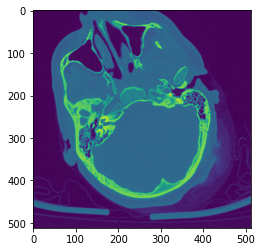

In [6]:
import pydicom as dicom

train_path = "../input/rsna-2022-cervical-spine-fracture-detection/train_images/1.2.826.0.1.3680043.21651"

path_image = train_path + "/72.dcm"
print(path_image)

ds = dicom.dcmread(path_image)
plt.imshow(ds.pixel_array)

In [7]:
# The segmented 'nii' files will provide us of the target.
# Still need to study what this 'transpose' is really doing.
import nibabel as nib
segmentations = nib.load("../input/rsna-2022-cervical-spine-fracture-detection/segmentations/1.2.826.0.1.3680043.21651.nii").get_fdata()[:, ::-1, ::-1].transpose(2, 1, 0)
print(segmentations.shape) # segmentations shape (num_images, height, width) 

# shape here for the study '1.2.826.0.1.3680043.10633' is 429 images of 512x512 pixels. 

(510, 512, 512)


**Segmented image**

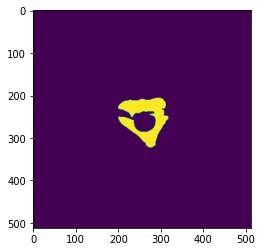

In [8]:
plt.imshow(segmentations[175])
plt.show()

In [9]:
np.unique(segmentations[175])

array([0., 2.])

In [10]:
#Segmentation 200. Indicates 201 dicom file IS REFERENCING C3.
vertebrae = []

for i in range (0, segmentations.shape[0]):
    if (np.unique(segmentations[i]).size == 2):
        vertebrae.append(i)

In [11]:
vertebrae

[3,
 4,
 18,
 19,
 70,
 71,
 72,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 248,
 249,
 250,
 251,
 252,
 253,
 254,
 255,
 256,
 257,
 258,
 259,
 260,
 261,
 262,
 263,
 264,
 265,
 266,
 267,
 285,
 286,
 287,
 288,
 289,
 290,
 291,
 292,
 293,
 294,
 295,
 296,
 297,
 320,
 321,
 322,
 323,
 324,
 325,
 326,
 327,
 328,
 329,
 330,
 331,
 332,
 355,
 356,
 357,
 358,
 359,
 360,
 361,
 362,
 363,
 364,
 365,
 366,
 367,
 395,
 396,
 397,
 398,
 399,
 400,
 401,
 402,
 435,
 436,
 437,
 438,
 439,
 440,
 441,
 442,
 443,
 444,
 445,
 446,
 447,
 448,
 449,
 478,
 479,
 480,
 481,
 482,
 483,
 484,
 485,
 486,
 487,
 488,
 489,
 490,
 491,
 492,
 493,
 494,
 495,
 496,
 497,
 498,
 499,
 500,
 501,
 502,
 503,
 504,
 50

In [12]:
train[train.StudyInstanceUID == "1.2.826.0.1.3680043.21651"]

,StudyInstanceUID,patient_overall,C1,C2,C3,C4,C5,C6,C7
782,1.2.826.0.1.3680043.21651,1,0,1,0,0,0,0,1


# TEST IMAGE

../input/rsna-2022-cervical-spine-fracture-detection/test_images/1.2.826.0.1.3680043.22327/
../input/rsna-2022-cervical-spine-fracture-detection/test_images/1.2.826.0.1.3680043.22327/60.dcm


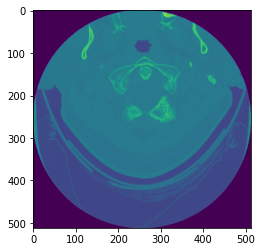

In [13]:
test_path = "../input/rsna-2022-cervical-spine-fracture-detection/test_images/"
studies = os.listdir(test_path)


path_study = test_path + studies[0] + "/"
print(path_study)

images = os.listdir(path_study)
path_image = path_study + images[102]
print(path_image)

ds = dicom.dcmread(path_image)
plt.imshow(ds.pixel_array)

In [14]:
import pydicom as dicom
from pydicom import dcmread
import matplotlib.pylab as plt
import cv2 

#bad_images 

# studies = os.listdir("../input/rsna-2022-cervical-spine-fracture-detection/train_images")

# for study in studies:
#     path_study = "../input/rsna-2022-cervical-spine-fracture-detection/train_images/" + study + "/"
#     images = os.listdir(path_study)
#     for image in images:
#         ds = dcmread(path_study + image)
#         try: 
#             trying = ds.pixel_array
#         except:
#             print(path_study)
#             break

In [15]:
f = open("../input/badimages/bad_images.txt", "r")
bad_images = []

# reading the file
data = f.read()
  
# replacing end of line('/n') with ' ' and
# splitting the text it further when '.' is seen.
bad_images = data.replace('\n', ' ').split(",")
  
# printing the data
print(bad_images[1])
f.close()

 ../input/rsna-2022-cervical-spine-fracture-detection/train_images/1.2.826.0.1.3680043.2668/


## Presenting Images

../input/rsna-2022-cervical-spine-fracture-detection/train_images/1.2.826.0.1.3680043.17625/
../input/rsna-2022-cervical-spine-fracture-detection/train_images/1.2.826.0.1.3680043.17625/66.dcm


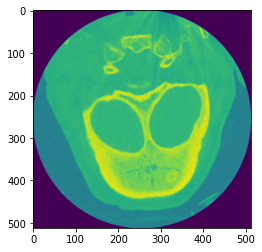

In [16]:
train_path = "../input/rsna-2022-cervical-spine-fracture-detection/train_images/"
studies = os.listdir(train_path)


path_study = train_path + studies[0] + "/"
print(path_study)

images = os.listdir(path_study)
path_image = path_study + images[100]
print(path_image)

ds = dicom.dcmread(path_image)
plt.imshow(ds.pixel_array)

In [17]:
print(ds)

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.17625.1.66
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.17625.1.66
(0008, 0023) Content Date                        DA: '20220727'
(0008, 0033) Content Time                        TM: '182650.710321'
(0010, 0010) Patient's Name                      PN: '17625'
(0010, 0020) Patient ID                          LO: '17625'
(0018, 0050) Slice Thickness                     DS: '0.625'
(0020, 000d) Study Instance UID                  UI: 1.2.826.0

In [18]:
# View above Study labels:

train[train["StudyInstanceUID"] == "1.2.826.0.1.3680043.17625"]

,StudyInstanceUID,patient_overall,C1,C2,C3,C4,C5,C6,C7
1645,1.2.826.0.1.3680043.17625,1,0,1,0,0,0,0,0
